<img src="mmu_logo.png" style="height: 120px;" align=left>  

# Lab 6: Learning Objectives

Towards the end of this lesson, you should be able to:
- Basic statistics using Python 




# Load Libraries

In [2]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from bioinfokit.analys import stat
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings("ignore")

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# Load Dataset

Load the dataset name "dataset.csv" into a variable named "df". The dataset keeps information about people from different states who suffer from diabetes, hypertension, heart disease, and kidney complication. They are from different races and with different ages and genders.

In [3]:
# Your codes here...

df = pd.read_csv('dataset.csv')

In [4]:
# How many records are there in this dataset?

len(df)

145169

In [5]:
# Get the top-10 records from the dataframe df

df.head(10)

Gender     Race        Age    District Diabetes Hypertension Heart_Disease  \
0      M  CHINESE  40.979001     Mersing        Y            Y             N   
1      M    MALAY  46.438010        Miri        Y            N             N   
2      F    MALAY  41.640907  Kuala Krai        N            N             Y   
3      M   INDIAN  36.346612       Kudat        N            N             Y   
4      M   INDIAN  35.487774     Kemaman        Y            N             N   
5      M   OTHERS  41.948400     Kemaman        N            N             Y   
6      M  CHINESE  38.168572     Pendang        N            N             N   
7      M   INDIAN  35.053409        Daro        N            N             N   
8      F   OTHERS  40.705301      Marang        N            N             Y   
9      M   INDIAN  33.133942       Pekan        Y            Y             N   

  Kidney_Complication     State  Income  
0                   N   Sarawak    5189  
1                   Y  Selangor    8293  
2                   N  Selangor    8138  
3                   N     Johor    9272  
4                   Y   Sarawak    9502  
5                   Y     Johor    4505  
6                   N     Kedah    4545  
7                   N   Sarawak    5865  
8                   Y     Kedah    6717  
9                   N   Sarawak    7680

<AxesSubplot:xlabel='Age', ylabel='Count'>

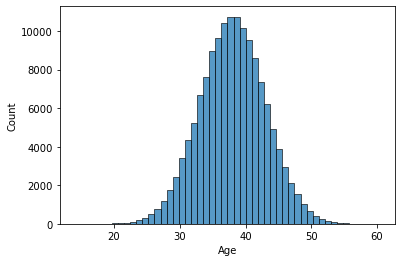

In [10]:
# Generate a histogram for the variable "Age" using bins=50

sns.histplot(data=df, x="Age", bins=50)

# Central Tendency

The central tendency of a distribution is an estimate of the “center” of a distribution of values.

## 1. Mean

Calculate mean for "Age"


In [12]:
np.mean(df.Age)

38.00309479748627

## 2. Median

Calculate median for "Age"

In [11]:
np.median(df.Age)

38.01451897534505

## 3. Mode

Calculate mode for "Age"

In [13]:
mode = stats.mode(df.Age)

print("The modal value is {} with a count of {}".format(mode.mode[0], mode.count[0]))

The modal value is 14.091260695899958 with a count of 1


In [14]:
mode

ModeResult(mode=array([14.0912607]), count=array([1]))

# Dispersion

## 1. Range
The range gives a measure of how spread apart the values are. The range is simply calculated as the maximum value – minimum value. Calculate the range for "Age"

In [15]:
np.ptp(df.Age)

46.31568593028284

## 2. Variance

Calculate the variance for "Age"

In [11]:
np.var(df.Age)

24.972512565964763

## 3. Standard Deviation

Calculate the standard deviation for "Age"

In [12]:
np.std(df.Age)

4.997250500621793

## 4. Quantile

Calculate Q1, Q2, Q3, Q4 for "Age"

In [17]:
print("Q1 quantile of data : ", np.quantile(df.Age, .25))
print("Q2 quantile of data : ", np.quantile(df.Age, .50))
print("Q3 quantile of data : ", np.quantile(df.Age, .75))
print("100th percentile of data : ", np.quantile(df.Age, 1)) 

Q1 quantile of data :  34.64770379348326
Q2 quantile of data :  38.01451897534505
Q3 quantile of data :  41.37396144726019
100th percentile of data :  60.4069466261828


# t-test

When we want to compare the means of two independent groups, we can choose between two different tests:

Student’s t-test: Assumes that both groups of data are sampled from populations that follow a normal distribution and that both populations have the same variance.

Welch’s t-test: Assumes that both groups of data are sampled from populations that follow a normal distribution, but it does not assume that those two populations have the same variance.

So, if the two samples do not have equal variance then it’s best to use the Welch’s t-test.

### Scenario

Based on the dataset above, investigate whether or not the means of patient ages are equal for Selangor and Johor.

The two hypotheses for this particular two sample t-test are as follows:

$H_0$: $\mu_1 = \mu_2$ (the two population means are equal)

$H_A$: $\mu_1 \neq \mu_2$ (the two population means are not equal)

Take note that the $alpha$ value, $\alpha$ = 0.05

### Step 1: Check the variance

As a rule of thumb, if the ratio of the larger variance to the smaller variance is less than 4 then we can assume the variances are approximately equal and use the Student’s t-test.


In [18]:
# Subset the age for Selangor and Johor

df_johor = df.loc[df.State=="Johor",'Age']
df_selangor = df.loc[df.State=="Selangor",'Age']


In [19]:
# Calculate the variance for the two datasets

print(np.var(df_johor), np.var(df_selangor))

24.865223515811916 25.2546009719321


### Step 2: Apply t-test

In [20]:
# Apply t-test

stats.ttest_ind(a=df_johor, b=df_selangor, equal_var=True)

Ttest_indResult(statistic=1.8259414323382421, pvalue=0.06786318258935468)

### Step 3: Interpret the findings

The t-test statistic is 1.8259414323382421 and the corresponding two-sided p-value is 0.06786318258935468.

Because the p-value of our test (0.06786318258935468) is greater than alpha = 0.05, we **fail to reject** the null hypothesis of the test. We do not have sufficient evidence to say that the mean age of patients between the two populations is different.

# ANOVA

- to compare the means of more than 2 groups 
- Residuals (experimental error) are approximately normally distributed (Shapiro-Wilks test or histogram)
- The dependent variable should be continuous


### Scenario

Based on the dataset above, investigate whether or not the means of patient ages are equal for ALL the states (Selangor, Kedah, Johor, Sarawak).

The two hypotheses for this particular One-Way ANOVA are as follows:

$H_0$: $\mu_1 = \mu_2 = \mu_3 = \mu_4$ (Groups means are equal (no variation in means of groups))

$H_A$: $\mu_1 \neq \mu_2 \neq \mu_3 \neq \mu_4$ (Groups means are NOT equal (variation in means of groups))

Take note that the $alpha$ value, $\alpha$ = 0.05

### Step 1: Test of normality

<AxesSubplot:xlabel='State', ylabel='Age'>

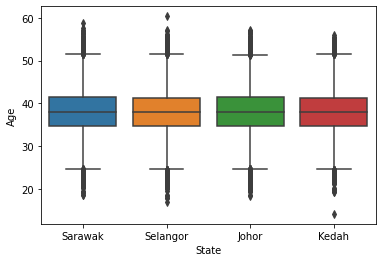

In [21]:
# Boxplot

sns.boxplot(x='State', y='Age', data=df)

In [22]:
# Your should later notice that all the p-values are not significant (p>0.05), we fail to reject null hypothesis and conclude that data is normally distributed

print(stats.shapiro(df.loc[df.State=='Selangor','Age']))
print(stats.shapiro(df.loc[df.State=='Sarawak','Age']))
print(stats.shapiro(df.loc[df.State=='Kedah','Age']))
print(stats.shapiro(df.loc[df.State=='Johor','Age'])) 

sns.displot(
    df, x="Age", col="State",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True))

ShapiroResult(statistic=0.9999632835388184, pvalue=0.9588066339492798)
ShapiroResult(statistic=0.9999396204948425, pvalue=0.6494661569595337)
ShapiroResult(statistic=0.9999119639396667, pvalue=0.2546764314174652)
ShapiroResult(statistic=0.999954342842102, pvalue=0.8749073147773743)


### Step 2: Apply One-Way ANOVA

In [24]:
# Ordinary Least Squares (OLS) model
model = ols('Age ~ C(State)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq        df         F    PR(>F)
C(State)  1.787978e+02       3.0  2.386647  0.066975
Residual  3.625056e+06  145165.0       NaN       NaN

The p-value obtained from ANOVA analysis is 0.066975, and therefore, we conclude that there are **NO** significant differences among the states.

From ANOVA analysis, we know that treatment differences are statistically significant, but ANOVA does not tell which treatments are significantly different from each other. To know the pairs of significant different treatments, we will perform multiple pairwise comparison (post hoc comparison) analysis for all unplanned comparison using Tukey’s honestly significantly differenced (HSD) test.

### Step 3: Apply Tukey's HSD test

In [21]:
res = stat()
res.tukey_hsd(df=df, res_var='Age', xfac_var='State', anova_model='Age ~ C(State)')
res.tukey_summary

group1    group2      Diff     Lower     Upper   q-value   p-value
0   Sarawak  Selangor  0.085729 -0.009528  0.180986  3.269780  0.095183
1   Sarawak     Johor  0.017938 -0.077473  0.113348  0.683069  0.900000
2   Sarawak     Kedah  0.067929 -0.027468  0.163326  2.587066  0.259547
3  Selangor     Johor  0.067791 -0.027419  0.163001  2.586882  0.259612
4  Selangor     Kedah  0.017800 -0.077396  0.112996  0.679349  0.900000
5     Johor     Kedah  0.049991 -0.045359  0.145341  1.904833  0.529121

Now, you should see the comparison between any given two states. You can see if there is any statistical significance in terms of the mean by looking at the respective p-value.

### Apply Two-Way ANOVA

Suppose that we want to investigate if Race and State do influence the Income.

In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Income ~ C(Race) + C(State) + C(Race):C(State)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2) # typ=2 indicates equal sample size
anova_table

sum_sq        df         F    PR(>F)
C(Race)           6.764199e+06       3.0  0.944778  0.417882
C(State)          6.261556e+06       3.0  0.874572  0.453349
C(Race):C(State)  4.859303e+06       9.0  0.226238  0.990882
Residual          3.464106e+11  145153.0       NaN       NaN

The p-value obtained from ANOVA analysis for Race, State, and interaction are statistically **NOT** significant (p<0.05). We conclude that both Race and State do not influence the Income, and that interaction of both Race and State do NOT significantly affects the Income.

### Levene’s test 

to check the assumption of homogeneity of variances

In [21]:
res = stat()
res.levene(df=df, res_var='Income', xfac_var=['State', 'Race'])
res.levene_summary

Parameter    Value
0      Test statistics (W)   1.1364
1  Degrees of freedom (Df)  15.0000
2                  p value   0.3161

As the p-value (0.3161) is non-significant, we **fail to reject the null hypothesis** and conclude that treatments have equal variances.

# Chi-square (χ2) test

Chi-square test is a non-parametric (distribution-free) method used to compare the relationship between the two categorical (nominal) variables in a contingency table.

$H_0$: The two categorical variables are independent (no association between the two variables) 

$H_1$: The two categorical variables are dependent (there is an association between the two variables) ( Ha: Oi ≠ Ei )



### Scenario: 

Suppose you want to investigate is there a difference between race and diabetes. You are interested in Malay and Chinese only.

In [25]:
df_cs = df.loc[(df.Race=='CHINESE') | (df.Race=='MALAY')]

contigency= pd.crosstab(df_cs['Race'], df_cs['Diabetes']) 
contigency

Diabetes      N      Y
Race                  
CHINESE   18248  17992
MALAY     18068  18196

<AxesSubplot:xlabel='Diabetes', ylabel='Race'>

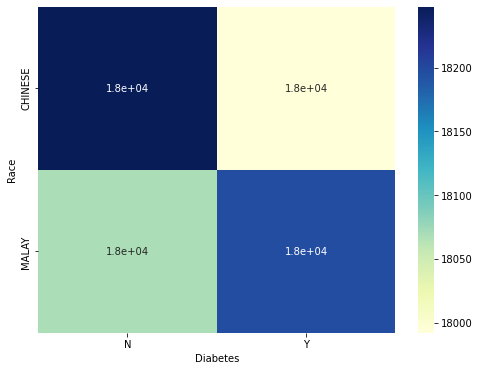

In [26]:
plt.figure(figsize=(8,6)) 
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

<AxesSubplot:xlabel='Diabetes', ylabel='Race'>

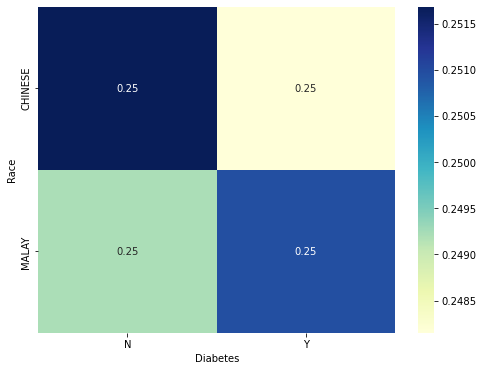

In [27]:
contigency_pct= pd.crosstab(df_cs['Race'], df_cs['Diabetes'], normalize='all') 
contigency_pct

plt.figure(figsize=(8,6)) 
sns.heatmap(contigency_pct, annot=True, cmap="YlGnBu")

In [28]:
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(contigency) 

# Print the p-value
print(p)

0.15594774099918518


The p-value is 0.1559 which means that we **do not reject** the null hypothesis at 95% level of confidence. That is Race and Diabetes are independent.